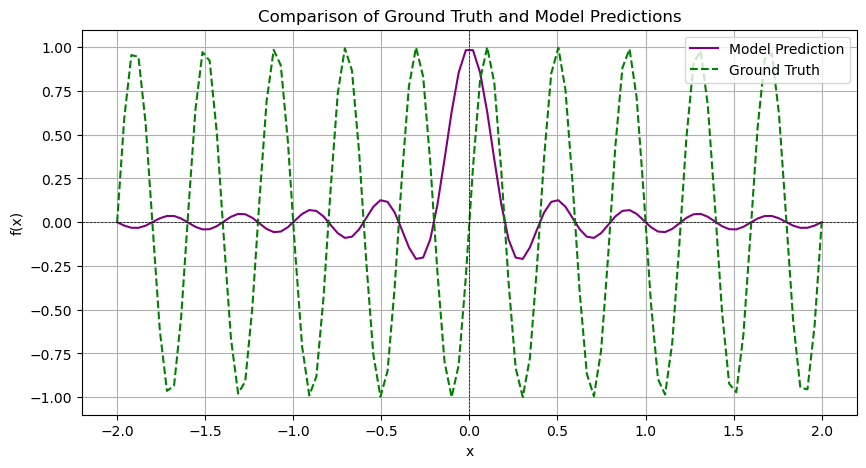

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Below is the simulating functions
def training_function_one(x):
    pi = torch.tensor(np.pi)
    return torch.sin(5 * pi * x) / (5 * pi * x)

def ground_truth_function(x):
    return np.sin(5 * np.pi * x)

# Define the range or values for x
x_values = torch.linspace(-2, 2, 100)  # We are keeping 100 points between -2 and 2
y_predictions = training_function_one(x_values)
y_ground_truth = ground_truth_function(x_values.numpy())

# Converting the predictions to numpy
y_predictions_np = y_predictions.numpy()

# Plotting based on above
plt.figure(figsize=(10, 5))
plt.plot(x_values.numpy(), y_predictions_np, label='Model Prediction', color='purple')
plt.plot(x_values.numpy(), y_ground_truth, label='Ground Truth', color='green', linestyle='dashed')
plt.title('Comparison of Ground Truth and Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

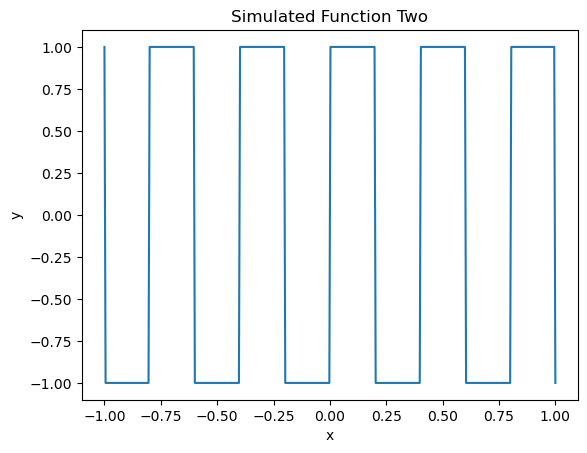

In [23]:
def training_function_two(x):
    pi = torch.tensor(np.pi)
    return torch.sign(torch.sin(5 * pi * x))

# Creatting the range of x values from -1 to 1
x_values = torch.linspace(-1, 1, 400)

# Below is the evaluation of the function at each x value
y_values = training_function_two(x_values)

# Converting tensors to numpy arrays for plotting
x_values_np = x_values.numpy()
y_values_np = y_values.numpy()

# Creating the plot based on above
plt.plot(x_values_np, y_values_np)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Function Two')
plt.show()

In [24]:
def calculate_parameters(model):
    total_params = 0
    for param in model.parameters():
        total_params += param.numel()
    return total_params

In [26]:
class CNN_Model_Zero(nn.Module):
    def __init__(self):
        super(CNN_Model_Zero, self).__init__()
        self.conv1 = nn.Conv1d(1, 5, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(5, 9)
        self.fc2 = nn.Linear(9, 12)
        self.fc3 = nn.Linear(12, 13)
        self.fc4 = nn.Linear(13, 9)
        self.fc5 = nn.Linear(9, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    print('Numb of parameters in model 0 - ', calculate_parameters(CNN_Model_Zero()))

class CNN_Model_One(nn.Module):
    def __init__(self):
        super(CNN_Model_One, self).__init__()
        self.conv1 = nn.Conv1d(1, 4, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 27)
        self.fc3 = nn.Linear(27, 33)
        self.fc4 = nn.Linear(33, 41)
        self.fc5 = nn.Linear(41, 59)
        self.fc6 = nn.Linear(59, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x
    print('Numb of parameters in model 1 - ', calculate_parameters(CNN_Model_One()))

class CNN_Model_Two(nn.Module):
    def __init__(self):
        super(CNN_Model_Two, self).__init__()
        self.conv1 = nn.Conv1d(1, 1, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(1, 190)
        self.fc2 = nn.Linear(190, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    print('Numb of parameters in model 2 - ', calculate_parameters(CNN_Model_Two()))

Numb of parameters in model 0 -  499
Numb of parameters in model 1 -  5411
Numb of parameters in model 2 -  575


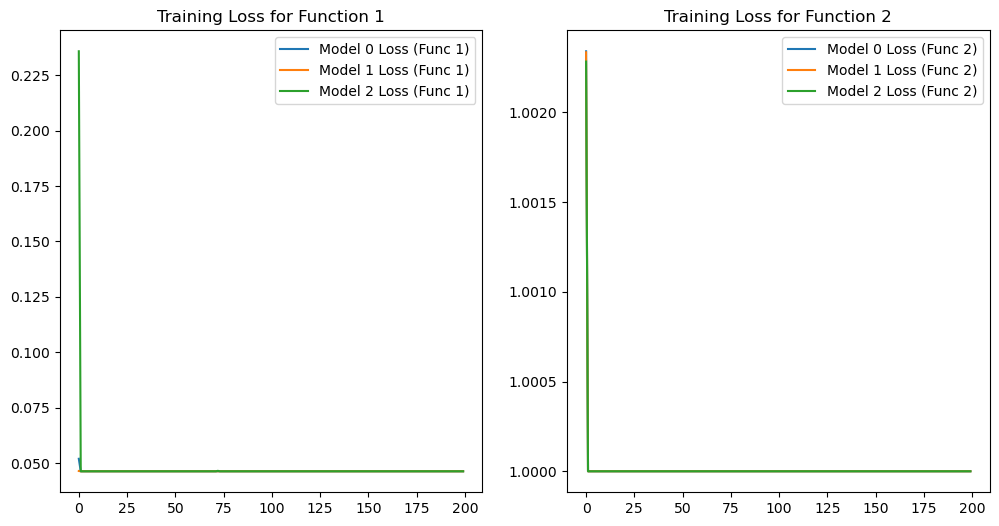

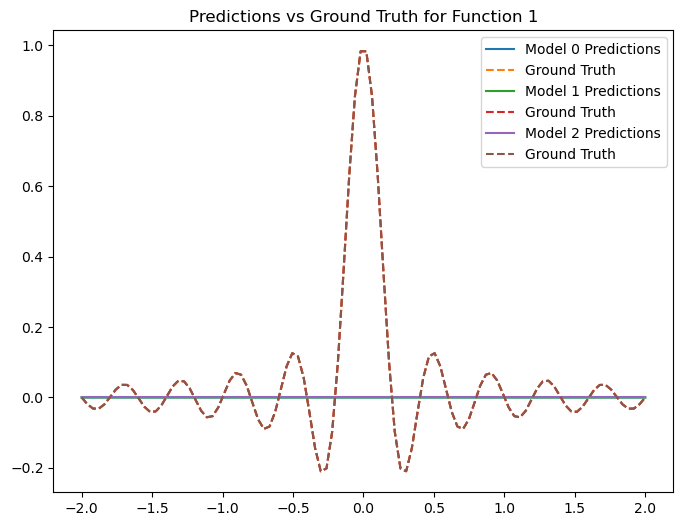

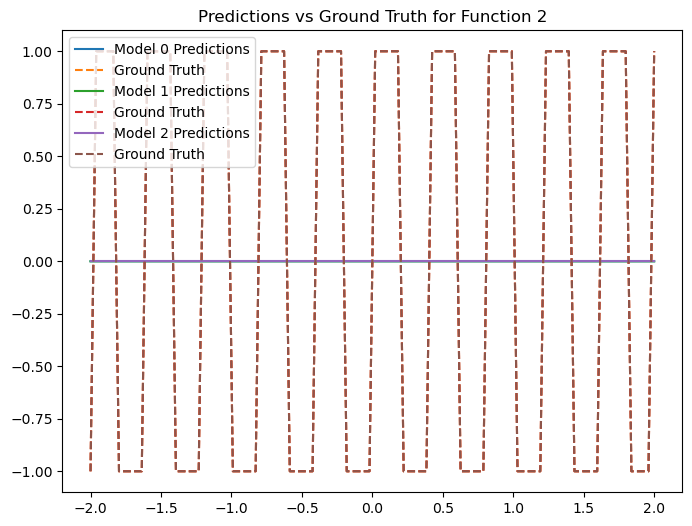

In [27]:
# Training the function
def train_model(model, optimizer, criterion, function, epochs=20000):
    loss_history = []
    for epoch in range(epochs):
        inputs = torch.linspace(-2, 2, 64).unsqueeze(1).unsqueeze(1)  # Batch size 64, unsqueeze for 1D CNN
        targets = function(inputs)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            loss_history.append(loss.item())
    return loss_history

# Instantiating the models & optimizers
model_0 = CNN_Model_Zero()
model_1 = CNN_Model_One()
model_2 = CNN_Model_Two()

optimizer0 = optim.Adam(model_0.parameters(), lr=0.001)
optimizer1 = optim.Adam(model_1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model_2.parameters(), lr=0.001)

criterion = nn.MSELoss()

# Training all 3 models on Function 1
loss_model0_func1 = train_model(model_0, optimizer0, criterion, training_function_one)
loss_model1_func1 = train_model(model_1, optimizer1, criterion, training_function_one)
loss_model2_func1 = train_model(model_2, optimizer2, criterion, training_function_one)

# Training all 3 models on Function 2
loss_model0_func2 = train_model(model_0, optimizer0, criterion, training_function_two)
loss_model1_func2 = train_model(model_1, optimizer1, criterion, training_function_two)
loss_model2_func2 = train_model(model_2, optimizer2, criterion, training_function_two)

# Plotting the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_model0_func1, label='Model 0 Loss (Func 1)')
plt.plot(loss_model1_func1, label='Model 1 Loss (Func 1)')
plt.plot(loss_model2_func1, label='Model 2 Loss (Func 1)')
plt.legend()
plt.title('Training Loss for Function 1')

plt.subplot(1, 2, 2)
plt.plot(loss_model0_func2, label='Model 0 Loss (Func 2)')
plt.plot(loss_model1_func2, label='Model 1 Loss (Func 2)')
plt.plot(loss_model2_func2, label='Model 2 Loss (Func 2)')
plt.legend()
plt.title('Training Loss for Function 2')

plt.show()

# Visualize predicted vs ground truth
def plot_predictions(model, function, model_name):
    inputs = torch.linspace(-2, 2, 100).unsqueeze(1).unsqueeze(1)
    with torch.no_grad():
        predictions = model(inputs)
    ground_truth = function(inputs)

    plt.plot(inputs.squeeze().numpy(), predictions.squeeze().numpy(), label=f'{model_name} Predictions')
    plt.plot(inputs.squeeze().numpy(), ground_truth.squeeze().numpy(), label='Ground Truth', linestyle='dashed')
    plt.legend()

# Plotting predictions for function 1 based on result
plt.figure(figsize=(8, 6))
plot_predictions(model_0, training_function_one, 'Model 0')
plot_predictions(model_1, training_function_one, 'Model 1')
plot_predictions(model_2, training_function_one, 'Model 2')
plt.title('Predictions vs Ground Truth for Function 1')
plt.show()

# Plotting predictions for function 2 based on result
plt.figure(figsize=(8, 6))
plot_predictions(model_0, training_function_two, 'Model 0')
plot_predictions(model_1, training_function_two, 'Model 1')
plot_predictions(model_2, training_function_two, 'Model 2')
plt.title('Predictions vs Ground Truth for Function 2')
plt.show()